In [1]:
import os
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import shutil
from sklearn.feature_extraction import image

In [2]:
!pip install glob2


In [2]:
# Custom packages
from dataloader import FATDataset
from utils import get_preprocessing
from mediseg import UnetPlusPlus
import torch
import torchvision
import segmentation_models_pytorch as smp

/truba/home/isahin/miniconda3/envs/gaugan_pytorch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Data Distribution For Training Phase
Images 812
Masks 812
Data Distribution For Validation Phase
Images 91
Masks 91
tensor([[[0.6745, 0.4549, 0.6157],
         [0.6353, 0.4471, 0.6118],
         [0.7569, 0.6039, 0.7412],
         ...,
         [0.2039, 0.1412, 0.3137],
         [0.2157, 0.1529, 0.3255],
         [0.2471, 0.1765, 0.3490]],

        [[0.7020, 0.4510, 0.6118],
         [0.6157, 0.3961, 0.5529],
         [0.6902, 0.5020, 0.6392],
         ...,
         [0.2314, 0.1412, 0.3176],
         [0.2039, 0.1373, 0.2941],
         [0.1725, 0.1373, 0.2706]],

        [[0.7765, 0.4980, 0.6510],
         [0.6980, 0.4431, 0.5922],
         [0.6941, 0.4667, 0.6078],
         ...,
         [0.2314, 0.1333, 0.3020],
         [0.2039, 0.1255, 0.3333],
         [0.1647, 0.1137, 0.3451]],

        ...,

        [[0.9647, 0.6667, 0.8235],
         [0.9882, 0.7098, 0.8392],
         [0.9961, 0.6627, 0.7961],
         ...,
         [0.9490, 0.9176, 0.9216],
         [0.9490, 0.9176, 0.9255],
   

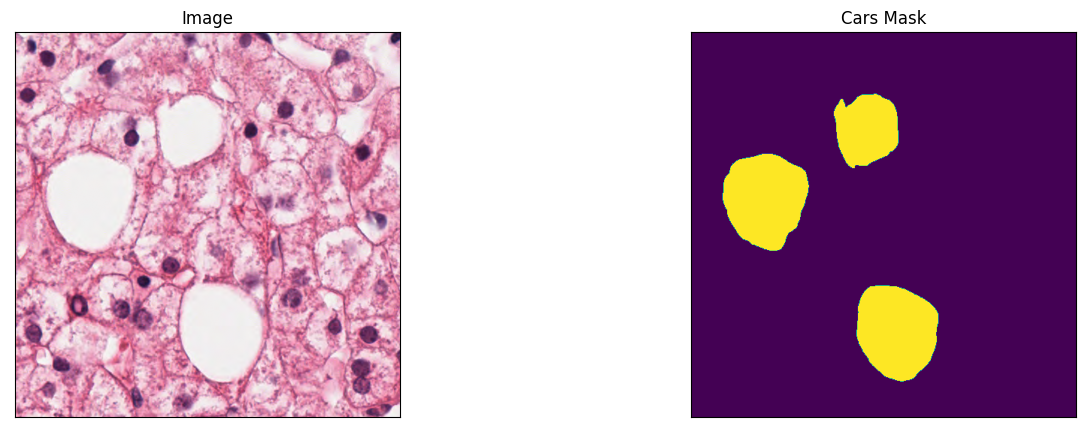

In [6]:
ENCODER = "tu-hrnet_w30"
ENCODER_WEIGHTS = 'imagenet'
preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)
# train_transform = A.Compose([
#     A.HorizontalFlip(p=0.40),
#     A.augmentations.geometric.transforms.VerticalFlip(p=0.25),
#     # A.RandomBrightnessContrast(p=0.2),
#     # A.augmentations.transforms.CLAHE(clip_limit=4.0, tile_grid_size=(8, 8), always_apply=False, p=0.5),
#     # A.augmentations.transforms.ColorJitter (brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2, always_apply=False, p=0.3),
#     # A.augmentations.transforms.GaussNoise (var_limit=(10.0, 50.0), mean=0, per_channel=True, always_apply=False, p=0.5)
#     ])
# # Initializing the dataset objects for train, valid, and test cohorts
# train_dataset = FATDataset(img_path = "fat_data/fat_detection/img_dir/train", mode = "Training", transform=train_transform, preprocessing=get_preprocessing(preprocessing_fn))
# val_dataset = FATDataset(img_path = "fat_data/fat_detection/img_dir/val", mode = "Validation",preprocessing=get_preprocessing(preprocessing_fn))
# test_dataset = MyDataset(root = r"/home/farhan/audio_classification/audio_classification_dir/data/test", filenames=test_lst, labels = test_labels, transforms=False)
# Initializing the dataset objects for train, valid, and test cohorts
train_dataset = FATDataset(img_path = "fat_data/fat_detection/img_dir/train", mode = "Training")#, preprocessing=get_preprocessing(preprocessing_fn))
val_dataset = FATDataset(img_path = "fat_data/fat_detection/img_dir/val", mode = "Validation")#,preprocessing=get_preprocessing(preprocessing_fn))

# helper function for data visualization
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

#Initializing the data loaders
train_batch_size = 16
val_batch_size = 8
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True, pin_memory=True)
valid_loader = torch.utils.data.DataLoader(val_dataset, batch_size=val_batch_size, pin_memory=True)

for idx, batch in enumerate(train_loader):
    # print(batch[0].shape)
    batch = batch
    print(batch[0][0])
    print(batch[0][0].shape)
    #batch[0][0] = batch[0][0].permute(2,0,1)
    visualize(
    image=batch[0][0], 
    cars_mask=batch[1][0].squeeze(),
    )

    # image.permute(0, 3, 1, 2)
    break



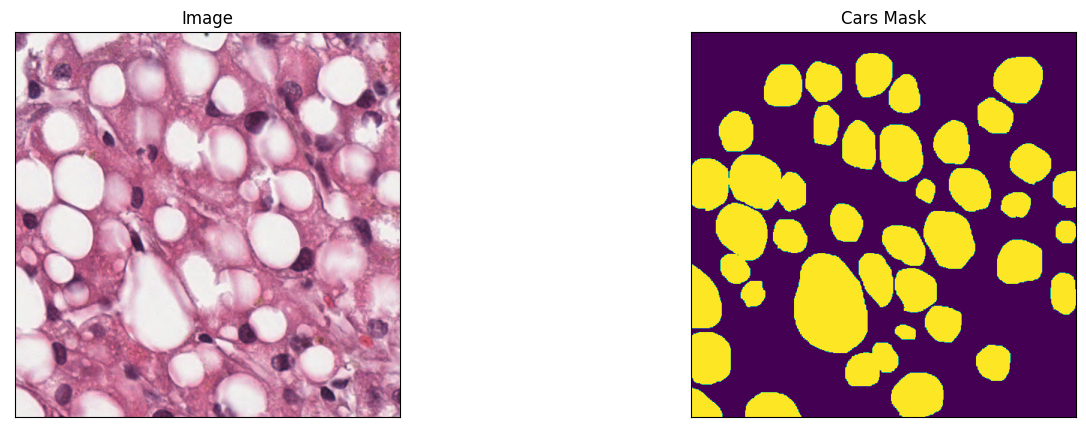

In [31]:
visualize(
    image=batch[0][0], 
    cars_mask=batch[1][0].squeeze(),
    )

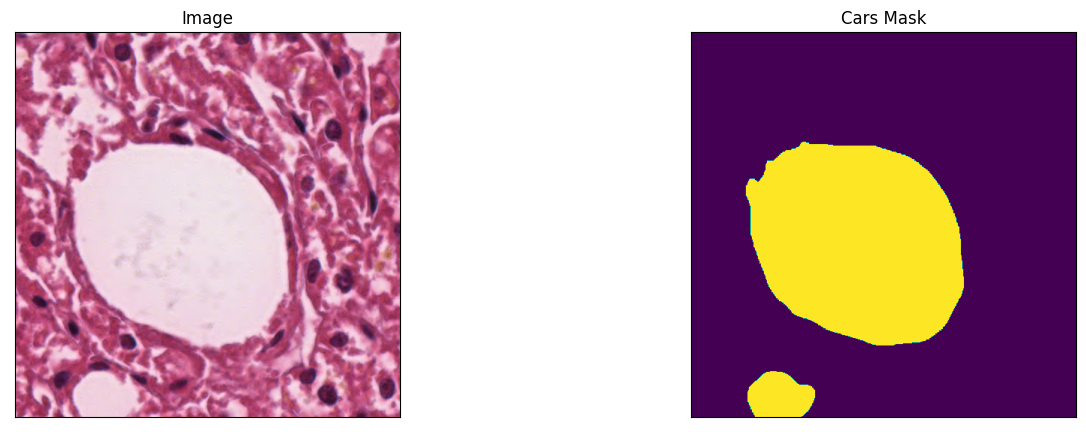

In [32]:
visualize(
    image=batch[0][1], 
    cars_mask=batch[1][1].squeeze(),
    )

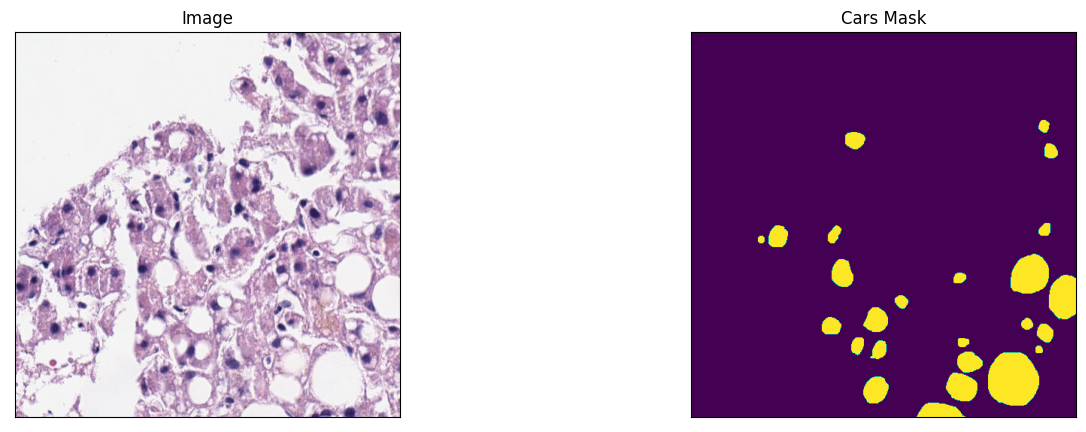

In [33]:
visualize(
    image=batch[0][3], 
    cars_mask=batch[1][3].squeeze(),
    )

In [2]:
base_dir= os.getcwd()
print(base_dir)


/test_stog/prostate/Uploaded Files


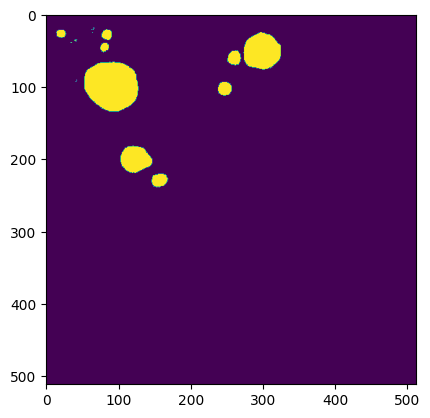

In [6]:
mask = cv2.imread('/truba/home/isahin/gaugan_pytorch/gaugan_fat/val_pred/0.png', cv2.IMREAD_UNCHANGED)
# mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.imshow(mask)
    

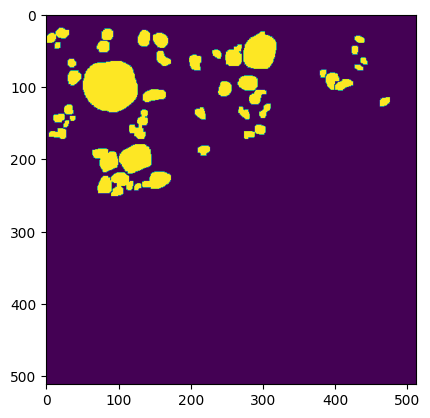

In [7]:
# directory_path = os.path.join(base_dir,"1/random/1.png")
img = cv2.imread('/truba/home/isahin/gaugan_pytorch/gaugan_fat/val_masks/0.png',cv2.IMREAD_UNCHANGED)
plt.imshow(img)
    

In [9]:
fig =1 
new_orig = os.path.join(base_dir,"mask/")
for image_path in sorted(glob.glob(os.path.join(base_dir,"mask/")+"*.png")):
#     print(fig,end = " ")
#     print(image_path)
    fig+=1
#     img = cv2.imread(image_path)
#     rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     path = os.path.join(new_orig,str(fig)+".png")
#     print(path)
#     cv2.imwrite(path,rgb_img)
  
    

In [3]:
# for image_path in sorted(glob.glob(os.path.join(base_dir,"mask/")+"*.png")):
#     img = cv2.imread(image_path)
#     rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     print(np.unique(rgb_img))

In [123]:
# # Pictures relabelling
# fig =1 
# new_orig = os.path.join(base_dir,"original2/")
# for image_path in sorted(glob.glob(os.path.join(base_dir,"original","*.png"))):
#     print(image_path)
#     img = cv2.imread(image_path)
#     rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     path = os.path.join(new_orig,str(fig)+".png")
#     print(path)
#     cv2.imwrite(path,rgb_img[:,:,[2,1,0]])
#     fig+=1



In [124]:
# # Mask relabelling
# fig =1 
# new_orig = os.path.join(base_dir,"mask2/")
# for image_path in sorted(glob.glob(os.path.join(base_dir,"mask","*.png"))):
#     print(image_path)
#     img = cv2.imread(image_path)
#     rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     path = os.path.join(new_orig,str(fig)+".png")
#     print(path)
#     cv2.imwrite(path,rgb_img[:,:,[2,1,0]])
#     fig+=1


    

In [1]:
# # #Original patches creation


# dir_path = os.path.join(base_dir,"2/2_5/images")
# os.chdir(dir_path)


# # Sorting out the files wrt to the integer numbers 
# listdir = glob.glob("*.png")
# num_sort_lst = []

# for i in listdir:
#     num_sort_lst.append(i.split(".png")[0])
    
# num_sort_lst=sorted(num_sort_lst,key = int)

# # Converting the sorted integers to png filename format
# for i in range(0,len(num_sort_lst)):
#     num_sort_lst[i] = num_sort_lst[i]+".png"
    
# print(num_sort_lst)
    
# # # Converting the sorted files to the patches
# fig = 9451
# for directory_path in num_sort_lst:
#     directory_path = os.path.join(dir_path,directory_path)
#     img = cv2.imread(directory_path)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     new_img = cv2.copyMakeBorder(img, 30, 30, 30,30, cv2.BORDER_CONSTANT, value = 0)
#     plt.imshow(new_img)
#     print(new_img.shape)
# #     img = imutils.resize(img, width=2560)
#     patches = patchify(new_img, (512,512,3),step= 512)
    
#     for i in range(0,patches.shape[0]):
#         for j in range(0,patches.shape[1]):
#             patch = patches[i,j,0]
#             path = str(fig)+".png"
#             cv2.imwrite(os.path.join("/test_stog/prostate/Uploaded Files/2/2_5/image_patches", path),patch[:,:,[2,1,0]])
#             fig+=1
            
# # Restoring the original working directory
# os.chdir(base_dir)
# print(os.getcwd())


In [126]:
#Type maps  creation
dir_path = os.path.join(base_dir,"2_5/images")
os.chdir(dir_path)

# Sorting out the files wrt to the integer numbers 
listdir = glob.glob("*.png")
num_sort_lst = []

for i in listdir:
    num_sort_lst.append(i.split(".png")[0])
    
num_sort_lst=sorted(num_sort_lst,key = int)

# Converting the sorted integers to png filename format
for i in range(0,len(num_sort_lst)):
    num_sort_lst[i] = num_sort_lst[i]+".png"
    
print(num_sort_lst)

# Restoring the original working directory
os.chdir(base_dir)
print(os.getcwd())


# # Making type maps of our images and masks
save_dir=os.path.join(os.getcwd(),"2_5/typemaps/")
print(save_dir)
for directory_path in num_sort_lst:
    fig = directory_path
    directory_path = os.path.join(base_dir,"2_5/masks",directory_path)
    print(directory_path)
    img = cv2.imread(directory_path, cv2.IMREAD_UNCHANGED)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    rgb_img=np.concatenate(img, axis=0)
    
    new=np.zeros(rgb_img.shape[0])
    yellow=rgb_img==[255,255,0]
    green=rgb_img==[0,255,0]
    blue=rgb_img==[0,0,255]
    red=rgb_img==[255,0,0]
    #print(red)
    new[np.all(red, axis=1)]=1
    new[np.all(blue, axis=1)]=2
    new[np.all(green, axis=1)]=3
    new[np.all(yellow, axis=1)]=4
    new=new.reshape(2500,2500)
    
    save_path=os.path.join(save_dir,fig)
    print(save_path)
    cv2.imwrite(
        save_path,
        new
    )




In [86]:
# # Converting type maps to type patches

# def image_noise_removal(img):
#     rectified_img = np.zeros((img.shape[0],img.shape[1]))               # New rectified image of the same size as the real image
    
#     # For blue labels 
#     new=np.zeros(img.shape[0]**2)
#     blue = img==2
#     blue =blue.reshape(img.shape[0]**2)
#     new[blue]=255
#     new=new.reshape(2560,2560)
#     new = new.astype(np.uint8)                        # Converting to uint8 for contour finding
#     contours, hierarchy = cv2.findContours(new, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#     for contour in contours:
#         if cv2.contourArea(contour) <  200:
#             cv2.drawContours(new, contour, -1, 0, 10)
    
#     positions = new==255
#     rectified_img[positions==True] = 2
    
#     # For red color label
#     new=np.zeros(img.shape[0]**2)
#     red = img==1
#     red = red.reshape(img.shape[0]**2)
#     new[red]=255
#     new=new.reshape(2560,2560)
#     new = new.astype(np.uint8)                        # Converting to uint8 for contour finding
#     contours, hierarchy = cv2.findContours(new, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#     for contour in contours:
#         if cv2.contourArea(contour) <  200:
#             cv2.drawContours(new, contour, -1, 0, 10)
    
#     positions = new==255
#     rectified_img[positions==True] = 1
    
#     # For green color label
#     new=np.zeros(img.shape[0]**2)
#     green = img==3
#     green = green.reshape(img.shape[0]**2)
#     new[green]=255
#     new=new.reshape(2560,2560)
#     new = new.astype(np.uint8)                        # Converting to uint8 for contour finding
#     contours, hierarchy = cv2.findContours(new, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#     for contour in contours:
#         if cv2.contourArea(contour) <  200:
#             cv2.drawContours(new, contour, -1, 0, 10)
    
#     positions = new==255
#     rectified_img[positions==True] = 3
    
#     # For yellow color label
#     new=np.zeros(img.shape[0]**2)
#     yellow = img==4
#     yellow = yellow.reshape(img.shape[0]**2)
#     new[yellow]=255
#     new=new.reshape(2560,2560)
#     new = new.astype(np.uint8)                        # Converting to uint8 for contour finding
#     contours, hierarchy = cv2.findContours(new, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#     for contour in contours:
#         if cv2.contourArea(contour) <  200:
#             cv2.drawContours(new, contour, -1, 0, 10)
    
#     positions = new==255
#     rectified_img[positions==True] = 4
#     plt.imshow(rectified_img==4)
    
#     # Return the rectified image for patch extraction in the end
#     return rectified_img


# #Converting the sorted typemaps to the pathches
# fig = 9451
# for directory_path in num_sort_lst:
#     directory_path = os.path.join(base_dir,"2/2_5/typemaps",directory_path)
#     img = cv2.imread(directory_path,cv2.IMREAD_UNCHANGED)
#     new_img = cv2.copyMakeBorder(img, 30, 30, 30,30, cv2.BORDER_CONSTANT, value = 0)
#     real_patches = patchify(img, (500,500),step= 500)                               # Getting the real patches for color analysis
#     clrs = np.unique(img)
# #     img = imutils.resize(img, width=2560)
# #     img = cv2.resize(img,(2560,2560),interpolation = cv2.INTER_LINEAR)
# #     img = image_noise_removal(img)
#     patches = patchify(new_img, (512,512),step= 512)
    
#     for i in range(0,patches.shape[0]):
#         for j in range(0,patches.shape[1]):
#             patch_clrs = np.unique(real_patches[i][j])
#             print(patch_clrs)
#             print(np.unique(patches[i][j]))
#             patch = patches[i,j]
#             clrs1 = np.unique(patch)
#             for color in clrs1:
#                 if color not in patch_clrs:
#                     print(fig)
#                     print("fault")
#                     clrs_positions=patch==color                                      # Identifying the positions of the faulty colors
#                     patch[clrs_positions]=0                           # Replacing the border faulty colors with the default background color                                                            
#             path = str(fig)+".png"
#             print(fig,end=" ")
#             cv2.imwrite(os.path.join(base_dir,"2/2_5/type_patches",path),patch)
#             fig = fig+1
            

            

        
    

(512, 512, 3)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 

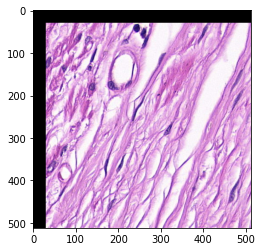

In [92]:
directory_path = os.path.join(base_dir,"1/patches/1.png")
img = cv2.imread(directory_path)
print(img.shape)
plt.imshow(img)
print(np.unique(img))

[0]
(512, 512)


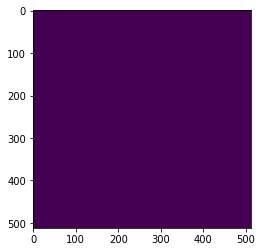

In [91]:
directory_path = os.path.join(base_dir,"1/type_patches/1.png")
img = cv2.imread(directory_path,cv2.IMREAD_UNCHANGED)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(np.unique(img))
print(img.shape)
# contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# for i in contours:
#     cv2.drawContours(img, i, -1, 0, 10)
plt.imshow(img)


In [87]:
#Sorting typemaps according to their numerical names

dir_path = os.path.join(base_dir,"2/2_5/type_patches")
os.chdir(dir_path)


# Sorting out the files wrt to the integer numbers 
listdir = glob.glob("*.png")
num_sort_lst = []

for i in listdir:
    num_sort_lst.append(i.split(".png")[0])
    
num_sort_lst=sorted(num_sort_lst,key = int)

# Converting the sorted integers to png filename format
for i in range(0,len(num_sort_lst)):
    num_sort_lst[i] = num_sort_lst[i]+".png"
    
print(num_sort_lst)
# Restoring the original working directory
os.chdir(base_dir)
print(os.getcwd())

# path = os.path.join(base_dir,"unet++/images/")
# print(len(path))
    

['9451.png', '9452.png', '9453.png', '9454.png', '9455.png', '9456.png', '9457.png', '9458.png', '9459.png', '9460.png', '9461.png', '9462.png', '9463.png', '9464.png', '9465.png', '9466.png', '9467.png', '9468.png', '9469.png', '9470.png', '9471.png', '9472.png', '9473.png', '9474.png', '9475.png', '9476.png', '9477.png', '9478.png', '9479.png', '9480.png', '9481.png', '9482.png', '9483.png', '9484.png', '9485.png', '9486.png', '9487.png', '9488.png', '9489.png', '9490.png', '9491.png', '9492.png', '9493.png', '9494.png', '9495.png', '9496.png', '9497.png', '9498.png', '9499.png', '9500.png', '9501.png', '9502.png', '9503.png', '9504.png', '9505.png', '9506.png', '9507.png', '9508.png', '9509.png', '9510.png', '9511.png', '9512.png', '9513.png', '9514.png', '9515.png', '9516.png', '9517.png', '9518.png', '9519.png', '9520.png', '9521.png', '9522.png', '9523.png', '9524.png', '9525.png', '9526.png', '9527.png', '9528.png', '9529.png', '9530.png', '9531.png', '9532.png', '9533.png', '95

In [140]:
# Unet++ preprocessing
save_path = os.path.join(base_dir,"unet++")
print(save_path)
# index = 1
for directory_path in num_sort_lst:                                                  
    index = directory_path                                                   # Saving the number.png reference for saving file in the relevant unet++ type directories
    directory_path = os.path.join(base_dir,"2/2_4/type_patches",directory_path)
    img = cv2.imread(directory_path,cv2.IMREAD_UNCHANGED)
    clrs = np.unique(img)
    if 0 in clrs:
        new=np.zeros(img.shape[0]**2)
        black = img==0
        black = black.reshape(img.shape[0]**2)
        new[black]=255
        new=new.reshape(512,512)
        cv2.imwrite(os.path.join(save_path,'masks/0',index),new)
        
    else:
        new=np.zeros(img.shape[0]**2)
        new=new.reshape(512,512)
        cv2.imwrite(os.path.join(save_path,'masks/0',index),new)
    
    if 1 in clrs:
        new=np.zeros(img.shape[0]**2)
        red = img==1
        red =red.reshape(img.shape[0]**2)
        new[red]=255
        new=new.reshape(512,512)
        cv2.imwrite(os.path.join(save_path,'masks/1',index),new)
        
    else:
        new=np.zeros(img.shape[0]**2)
        new=new.reshape(512,512)
        cv2.imwrite(os.path.join(save_path,'masks/1',index),new)
        
    if 2 in clrs:
        new=np.zeros(img.shape[0]**2)
        blue = img==2
        blue = blue.reshape(img.shape[0]**2)
        new[blue]=255
        new=new.reshape(512,512)
        cv2.imwrite(os.path.join(save_path,'masks/2',index),new)
        
    else:
        new=np.zeros(img.shape[0]**2)
        new=new.reshape(512,512)
        cv2.imwrite(os.path.join(save_path,'masks/2',index),new)

    if 3 in clrs:
        new=np.zeros(img.shape[0]**2)
        green = img==3
        green = green.reshape(img.shape[0]**2)
        new[green]=255
        new=new.reshape(512,512)
        cv2.imwrite(os.path.join(save_path,'masks/3',index),new)
        
    else:
        new=np.zeros(img.shape[0]**2)
        new=new.reshape(512,512)
        cv2.imwrite(os.path.join(save_path,'masks/3',index),new)

    if 4 in clrs:
        new=np.zeros(img.shape[0]**2)
        yellow = img==4
        yellow = yellow.reshape(img.shape[0]**2)
        new[yellow]=255
        new=new.reshape(512,512)
        cv2.imwrite(os.path.join(save_path,'masks/4',index),new)
        
    else:
        new=np.zeros(img.shape[0]**2)
        new=new.reshape(512,512)
        cv2.imwrite(os.path.join(save_path,'masks/4',index),new)



/test_stog/prostate/Uploaded Files/unet++


/test_stog/prostate/Uploaded Files/1/unet++


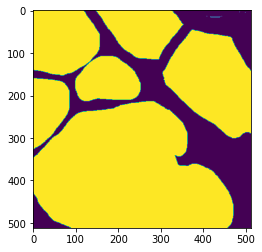

In [141]:
# Preprocessing for correcting the contours
save_path = os.path.join(base_dir,"1/unet++")
print(save_path)
areas = []
for directory_path in num_sort_lst:                                                  
    index = directory_path                                                   # Saving the number.png reference for saving file in the relevant unet++ type directories
    directory_path = os.path.join(base_dir,"1/unet++/masks/2",index)
    img = cv2.imread(directory_path,cv2.IMREAD_UNCHANGED)
    plt.imshow(img)
    contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
   
    for contour in contours:
#         print(cv2.contourArea(contour))
        if cv2.contourArea(contour) < 1000:
            cv2.drawContours(img, contour, -1, 0, 3)
        
    cv2.imwrite(os.path.join(save_path,'masks/2',index),img)



In [10]:
 # Unet++ preprocessing
save_path = os.path.join(base_dir,"unet")
directory_path = os.path.join(base_dir,"type_patches/376.png")
print(directory_path)
index='376.png'
img = cv2.imread(directory_path,0)
clrs = np.unique(img)
print(clrs)

# if 0 in clrs:
#     new=np.zeros(img.shape[0]**2)
#     black = img==0
#     black =black.reshape(img.shape[0]**2)
#     new[black]=255
#     new=new.reshape(512,512)
#     cv2.imwrite(os.path.join(save_path,'0',index),new)
    
# if 1 in clrs:
#     new=np.zeros(img.shape[0]**2)
#     red = img==1
#     red =red.reshape(img.shape[0]**2)
#     new[red]=255
#     new=new.reshape(512,512)
#     cv2.imwrite(os.path.join(save_path,'1',index),new)
    
# if 2 in clrs:
#     new=np.zeros(img.shape[0]**2)
#     blue = img==2
#     blue = blue.reshape(img.shape[0]**2)
#     new[blue]=255
#     new=new.reshape(512,512)
#     cv2.imwrite(os.path.join(save_path,'2',index),new)
    
# if 3 in clrs:
#     new=np.zeros(img.shape[0]**2)
#     green = img==3
#     green = green.reshape(img.shape[0]**2)
#     new[green]=255
#     new=new.reshape(512,512)
#     cv2.imwrite(os.path.join(save_path,'3',index),new)
    
# if 4 in clrs:
#     new=np.zeros(img.shape[0]**2)
#     yellow = img==4
#     yellow = yellow.reshape(img.shape[0]**2)
#     new[yellow]=255
#     new=new.reshape(512,512)
#     cv2.imwrite(os.path.join(save_path,'4',index),new)

    

/test_stog/prostate/Uploaded Files/1/type_patches/376.png
[0 1 2 3 4]


In [122]:
# # splits code 

# # print(num_sort_lst)
# imgs = num_sort_lst
# labels = num_sort_lst

# # print(imgs)
# # print(labels)

# X_train, X_test, y_train, y_test = train_test_split(imgs, labels, test_size=0.25, random_state=1)
# # print(X_test)

# # move the test files to their respective folder

# for i in X_test:
#     shutil.move(os.path.join(os.getcwd(),"prostate/images",i) , os.path.join(os.getcwd(),"prostate/test/images",i))
#     shutil.move(os.path.join(os.getcwd(),"prostate/masks",i) , os.path.join(os.getcwd(),"prostate/test/masks",i))

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)

# for i in X_train:
#     shutil.move(os.path.join(os.getcwd(),"prostate/images",i) , os.path.join(os.getcwd(),"prostate/train/images",i))
#     shutil.move(os.path.join(os.getcwd(),"prostate/masks",i) , os.path.join(os.getcwd(),"prostate/train/masks",i))
    
# for i in X_val:
#     shutil.move(os.path.join(os.getcwd(),"prostate/images",i) , os.path.join(os.getcwd(),"prostate/validation/images",i))
#     shutil.move(os.path.join(os.getcwd(),"prostate/masks",i) , os.path.join(os.getcwd(),"prostate/validation/masks",i))
    
# # # print(len(X_train))
# # # print(len(X_val))

In [116]:
# # Partioning the dataset

# imgs = num_sort_lst
# labels = num_sort_lst

# print(imgs)
# print(labels)

# X_train, X_test, y_train, y_test = train_test_split(imgs, labels, test_size=0.25, random_state=1)


# # # move the test files to their respective folder

# for i in X_test:
#     shutil.move(os.path.join(os.getcwd(),"original2",i) , os.path.join(os.getcwd(),"2_1/images",i))
#     shutil.move(os.path.join(os.getcwd(),"mask2",i) , os.path.join(os.getcwd(),"2_1/masks",i))

# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

# for i in X_test:
#     shutil.move(os.path.join(os.getcwd(),"original2",i) , os.path.join(os.getcwd(),"2_2/images",i))
#     shutil.move(os.path.join(os.getcwd(),"mask2",i) , os.path.join(os.getcwd(),"2_2/masks",i))
    
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

# for i in X_test:
#     shutil.move(os.path.join(os.getcwd(),"original2",i) , os.path.join(os.getcwd(),"2_3/images",i))
#     shutil.move(os.path.join(os.getcwd(),"mask2",i) , os.path.join(os.getcwd(),"2_3/masks",i))
    
# for i in X_train:
#     shutil.move(os.path.join(os.getcwd(),"original2",i) , os.path.join(os.getcwd(),"2_4/images",i))
#     shutil.move(os.path.join(os.getcwd(),"mask2",i) , os.path.join(os.getcwd(),"2_4/masks",i))


In [57]:
#Original patches creation


dir_path = os.path.join(base_dir,"2/2_1/image_patches")
os.chdir(dir_path)


# Sorting out the files wrt to the integer numbers 
listdir = glob.glob("*.png")
num_sort_lst = []

for i in listdir:
    num_sort_lst.append(i.split(".png")[0])
    
num_sort_lst=sorted(num_sort_lst,key = int)

# Converting the sorted integers to png filename format
for i in range(0,len(num_sort_lst)):
    num_sort_lst[i] = num_sort_lst[i]+".png"
    
print(num_sort_lst)

# Restoring the original working directory
os.chdir(base_dir)
print(os.getcwd())

['1476.png', '1477.png', '1478.png', '1479.png', '1480.png', '1481.png', '1482.png', '1483.png', '1484.png', '1485.png', '1486.png', '1487.png', '1488.png', '1489.png', '1490.png', '1491.png', '1492.png', '1493.png', '1494.png', '1495.png', '1496.png', '1497.png', '1498.png', '1499.png', '1500.png', '1501.png', '1502.png', '1503.png', '1504.png', '1505.png', '1506.png', '1507.png', '1508.png', '1509.png', '1510.png', '1511.png', '1512.png', '1513.png', '1514.png', '1515.png', '1516.png', '1517.png', '1518.png', '1519.png', '1520.png', '1521.png', '1522.png', '1523.png', '1524.png', '1525.png', '1526.png', '1527.png', '1528.png', '1529.png', '1530.png', '1531.png', '1532.png', '1533.png', '1534.png', '1535.png', '1536.png', '1537.png', '1538.png', '1539.png', '1540.png', '1541.png', '1542.png', '1543.png', '1544.png', '1545.png', '1546.png', '1547.png', '1548.png', '1549.png', '1550.png', '1551.png', '1552.png', '1553.png', '1554.png', '1555.png', '1556.png', '1557.png', '1558.png', '15

In [118]:
# # Partioning the dataset

# imgs = num_sort_lst
# labels = num_sort_lst

# print(imgs)
# print(labels)

# X_train, X_test, y_train, y_test = train_test_split(imgs, labels, test_size=0.5, random_state=1)


# # # move the test files to their respective folder

# for i in X_test:
#     shutil.move(os.path.join(os.getcwd(),"2_4/images",i) , os.path.join(os.getcwd(),"2_5/images",i))
#     shutil.move(os.path.join(os.getcwd(),"2_4/masks",i) , os.path.join(os.getcwd(),"2_5/masks",i))

In [111]:
# img = cv2.resize(img,(2560,2560),interpolation = cv2.INTER_LINEAR)

# fig =1
# directory_path = os.path.join(base_dir,"1/typemaps/16.png")
# img = cv2.imread(directory_path,cv2.IMREAD_UNCHANGED)
# plt.imshow(img)
# print(np.unique(img))
# real_patches = patchify(img, (500,500),step= 500)                               # Getting the real patches for color analysis
# clrs = np.unique(img)
# # img = imutils.resize(img, width=2560)
# img = cv2.resize(img,(2560,2560),interpolation = cv2.INTER_LINEAR)
# patches = patchify(img, (512,512),step= 512)    
# for i in range(0,patches.shape[0]):
#     for j in range(0,patches.shape[1]):
#         patch_clrs = np.unique(real_patches[i][j])
#         patch = patches[i,j]
#         clrs1 = np.unique(patch)
#         for color in clrs1:
#             if color not in patch_clrs:
#                 print(fig)
#                 print("fault")
#                 clrs_positions=patch==color                                      # Identifying the positions of the faulty colors
#                 patch[clrs_positions]=0                           # Replacing the border faulty colors with the default background color                                                            
#         path = str(fig)+".png"
#         cv2.imwrite(os.path.join(base_dir,"1/random",path),patch)
#         fig = fig+1

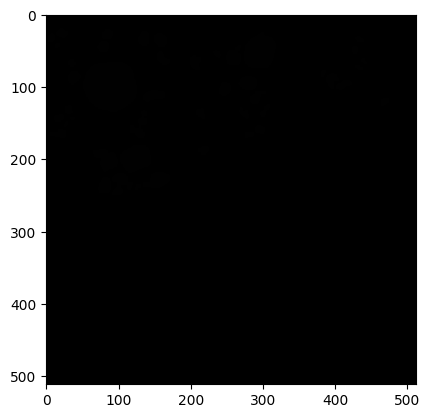

In [4]:
# directory_path = os.path.join(base_dir,"1/random/1.png")
img = cv2.imread('/truba/home/isahin/gaugan_pytorch/gaugan_fat/val_masks/0.png',cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
plt.imshow(img)
    

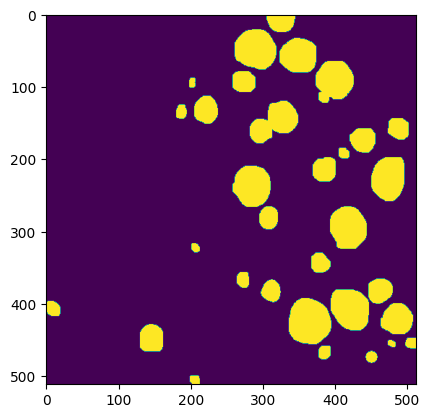

In [4]:
# directory_path = os.path.join(base_dir,"1/random/1.png")
img = cv2.imread('/truba/home/isahin/gaugan_pytorch/gaugan_fat/val_masks/0.png',cv2.IMREAD_UNCHANGED)
# contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# for contour in contours:
#     if cv2.contourArea(contour) < 1000:
#         cv2.drawContours(img, contour, -1, 0, 3)
    
plt.imshow(img)
    

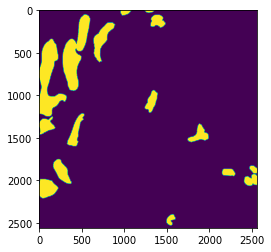

In [115]:
def image_noise_removal(img):
    rectified_img = np.zeros((img.shape[0],img.shape[1]))               # New rectified image of the same size as the real image
    
    # For blue labels 
    new=np.zeros(img.shape[0]**2)
    blue = img==2
    blue =blue.reshape(img.shape[0]**2)
    new[blue]=255
    new=new.reshape(2560,2560)
    new = new.astype(np.uint8)                        # Converting to uint8 for contour finding
    contours, hierarchy = cv2.findContours(new, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    for contour in contours:
        if cv2.contourArea(contour) <  200:
            cv2.drawContours(new, contour, -1, 0, 10)
    
    positions = new==255
    rectified_img[positions==True] = 2
    
    # For red color label
    new=np.zeros(img.shape[0]**2)
    red = img==1
    red = red.reshape(img.shape[0]**2)
    new[red]=255
    new=new.reshape(2560,2560)
    new = new.astype(np.uint8)                        # Converting to uint8 for contour finding
    contours, hierarchy = cv2.findContours(new, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    for contour in contours:
        if cv2.contourArea(contour) <  200:
            cv2.drawContours(new, contour, -1, 0, 10)
    
    positions = new==255
    rectified_img[positions==True] = 1
    
    # For green color label
    new=np.zeros(img.shape[0]**2)
    green = img==3
    green = green.reshape(img.shape[0]**2)
    new[green]=255
    new=new.reshape(2560,2560)
    new = new.astype(np.uint8)                        # Converting to uint8 for contour finding
    contours, hierarchy = cv2.findContours(new, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    for contour in contours:
        if cv2.contourArea(contour) <  200:
            cv2.drawContours(new, contour, -1, 0, 10)
    
    positions = new==255
    rectified_img[positions==True] = 3
    
    # For yellow color label
    new=np.zeros(img.shape[0]**2)
    yellow = img==4
    yellow = yellow.reshape(img.shape[0]**2)
    new[yellow]=255
    new=new.reshape(2560,2560)
    new = new.astype(np.uint8)                        # Converting to uint8 for contour finding
    contours, hierarchy = cv2.findContours(new, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    for contour in contours:
        if cv2.contourArea(contour) <  200:
            cv2.drawContours(new, contour, -1, 0, 10)
    
    positions = new==255
    rectified_img[positions==True] = 4
    plt.imshow(rectified_img==4)
    
    # Return the rectified image for patch extraction in the end
    return rectified_img
    
fig =1
directory_path = os.path.join(base_dir,"1/typemaps/16.png")
img = cv2.imread(directory_path,cv2.IMREAD_UNCHANGED)
real_patches = patchify(img, (500,500),step= 500)                               # Getting the real patches for color analysis
clrs = np.unique(img)
#     img = imutils.resize(img, width=2560)
img = cv2.resize(img,(2560,2560),interpolation = cv2.INTER_LINEAR)
img = image_noise_removal(img)
plt.imshow(img==4)
patches = patchify(img, (512,512),step= 512)
    
for i in range(0,patches.shape[0]):
    for j in range(0,patches.shape[1]):
        patch_clrs = np.unique(real_patches[i][j])
        patch = patches[i,j]
        clrs1 = np.unique(patch)
        for color in clrs1:
            if color not in patch_clrs:
                clrs_positions=patch==color                                      # Identifying the positions of the faulty colors
                patch[clrs_positions]=0                           # Replacing the border faulty colors with the default background color  
                
        path = str(fig)+".png"
  
        cv2.imwrite(os.path.join(base_dir,"1/random",path),patch)
        fig = fig+1
                

(2560, 2560)


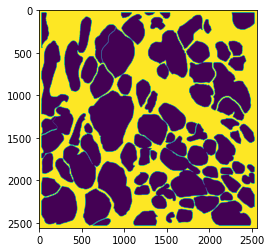

In [13]:
# For zero padding pre-processing of the data

fig =1
directory_path = os.path.join(base_dir,"1/typemaps/16.png")
img = cv2.imread(directory_path,cv2.IMREAD_UNCHANGED)
new_img = img.copy()

new_img = cv2.copyMakeBorder(new_img, 30, 30, 30,30, cv2.BORDER_CONSTANT, value = 0)
plt.imshow( new_img==0)
print(new_img.shape)
real_patches = patchify(img, (500,500),step= 500)                   # Getting the real patches for color analysis
clrs = np.unique(img)
# #     img = imutils.resize(img, width=2560)
# img = cv2.resize(img,(2560,2560),interpolation = cv2.INTER_LINEAR)
# img = image_noise_removal(img)
# plt.imshow(new_img)
patches = patchify(new_img, (512,512),step= 512)
    
for i in range(0,patches.shape[0]):
    for j in range(0,patches.shape[1]):
        patch_clrs = np.unique(real_patches[i][j])
        patch = patches[i,j]
        clrs1 = np.unique(patch)
        for color in clrs1:
            if color not in patch_clrs:
                clrs_positions=patch==color                                      # Identifying the positions of the faulty colors
                patch[clrs_positions]=0                           # Replacing the border faulty colors with the default background color  
                
        path = str(fig)+".png"
  
        cv2.imwrite(os.path.join(base_dir,"1/random",path),patch)
        fig = fig+1


(512, 512)


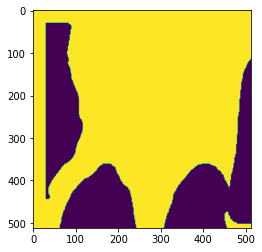

In [15]:
plt.imshow(patches[0][0]==0)
print(patches[0][0].shape)